### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mtp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

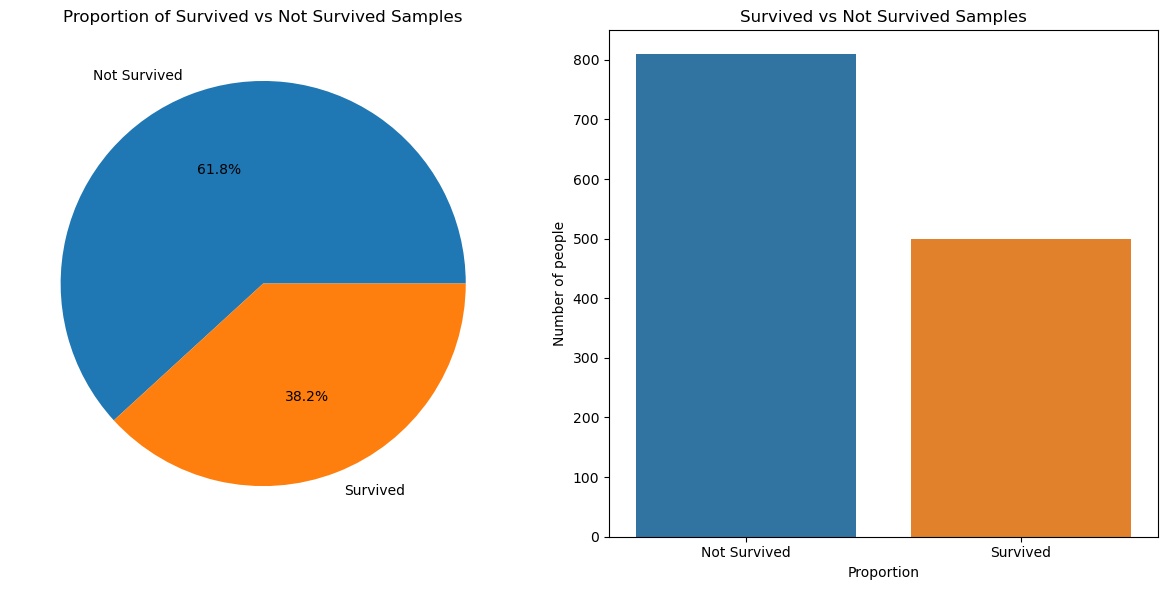

In [2]:
### write your code here. Load the dataset and plot (barplot) proportion of each class 

df = pd.read_csv('titanic.csv')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

proportion = df['survived'].value_counts()

# Plotting the pie chart
axes[0].pie(proportion, labels=['Not Survived', 'Survived'], autopct='%1.1f%%')
axes[0].set_title('Proportion of Survived vs Not Survived Samples')

# Plotting the horizontal bar plot
sns.barplot(x=['Not Survived', 'Survived'], y=proportion.values, ax=axes[1])
axes[1].set_title('Survived vs Not Survived Samples')
axes[1].set_xlabel('Proportion')
axes[1].set_ylabel('Number of people')

# Adjust layout
plt.tight_layout()

# Display the subplot
plt.show()



#### Preprocess the data as it has been done in the lab, feel free to adapt

In [3]:
# removing name column
df = df.drop(['name'], axis = 1)

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,0,1,female,2.00,1,2,151.5500,S
3,0,1,male,30.00,1,2,151.5500,S
4,0,1,female,25.00,1,2,151.5500,S
...,...,...,...,...,...,...,...,...
1304,0,3,female,14.50,1,0,14.4542,C
1305,0,3,female,NaN,1,0,14.4542,C
1306,0,3,male,26.50,0,0,7.2250,C
1307,0,3,male,27.00,0,0,7.2250,C


In [5]:
# imputing missing values

# Compute the number of NaN in each column 
def computeNan():
    nan_counts = df.isna().sum()
    # Display the result
    print("Number of NaN values in each column:")
    print(nan_counts)

# Remove NaN values in df and replace the most_frequent_age
most_frequent_age = df['age'].mode()[0]
df['age'] = df['age'].fillna(most_frequent_age)

# Remove NaN values in df and replace the "S" class
df['embarked'] = df['embarked'].fillna('S')
df['fare'] = df['fare'].fillna(df['fare'].mode()[0])
computeNan()

Number of NaN values in each column:
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


In [6]:
# one-hot-encode categorical features
from sklearn.preprocessing import OneHotEncoder

# one-hot-encode categorical features
encoder = OneHotEncoder(drop='first')
f_names = ['sex', 'embarked']
encoded_feats = encoder.fit_transform(df[f_names])
new_cols = pd.DataFrame(encoded_feats.toarray(), columns=encoder.get_feature_names_out(f_names))
new_df = pd.concat([df, new_cols], axis=1)
# Drop the original categorical features
new_df.drop(['sex', 'embarked'], axis=1, inplace=True)


In [9]:
# Check
# df = new_df
# df 

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1,1,29.00,0,0,211.3375,0.0,0.0,1.0
1,1,1,0.92,1,2,151.5500,1.0,0.0,1.0
2,0,1,2.00,1,2,151.5500,0.0,0.0,1.0
3,0,1,30.00,1,2,151.5500,1.0,0.0,1.0
4,0,1,25.00,1,2,151.5500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1304,0,3,14.50,1,0,14.4542,0.0,0.0,0.0
1305,0,3,24.00,1,0,14.4542,0.0,0.0,0.0
1306,0,3,26.50,0,0,7.2250,1.0,0.0,0.0
1307,0,3,27.00,0,0,7.2250,1.0,0.0,0.0


In [8]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler

# feature scaling
scaler = MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns=df.columns)
df

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,0.0,0.361142,0.000,0.000000,0.412503,0.0,0.0,1.0
1,1.0,0.0,0.009395,0.125,0.222222,0.295806,1.0,0.0,1.0
2,0.0,0.0,0.022924,0.125,0.222222,0.295806,0.0,0.0,1.0
3,0.0,0.0,0.373669,0.125,0.222222,0.295806,1.0,0.0,1.0
4,0.0,0.0,0.311036,0.125,0.222222,0.295806,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1304,0.0,1.0,0.179506,0.125,0.000000,0.028213,0.0,0.0,0.0
1305,0.0,1.0,0.298509,0.125,0.000000,0.028213,0.0,0.0,0.0
1306,0.0,1.0,0.329826,0.000,0.000000,0.014102,1.0,0.0,0.0
1307,0.0,1.0,0.336089,0.000,0.000000,0.014102,1.0,0.0,0.0


## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
# Test case Example
positive_samples = df[df['survived'] == 1].sample(frac=0.2, random_state=42)
negative_samples = df[df['survived'] == 0].sample(frac=1-0.2, random_state=42)
imbalanced_df = pd.concat([positive_samples, negative_samples])

# Split the data into features (X) and labels (y)
X = imbalanced_df.drop('survived', axis=1)
y = imbalanced_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
print(accuracy,precision,recall,f1_score)

0.8866666666666667 1.0 0.34615384615384615 0.5142857142857142


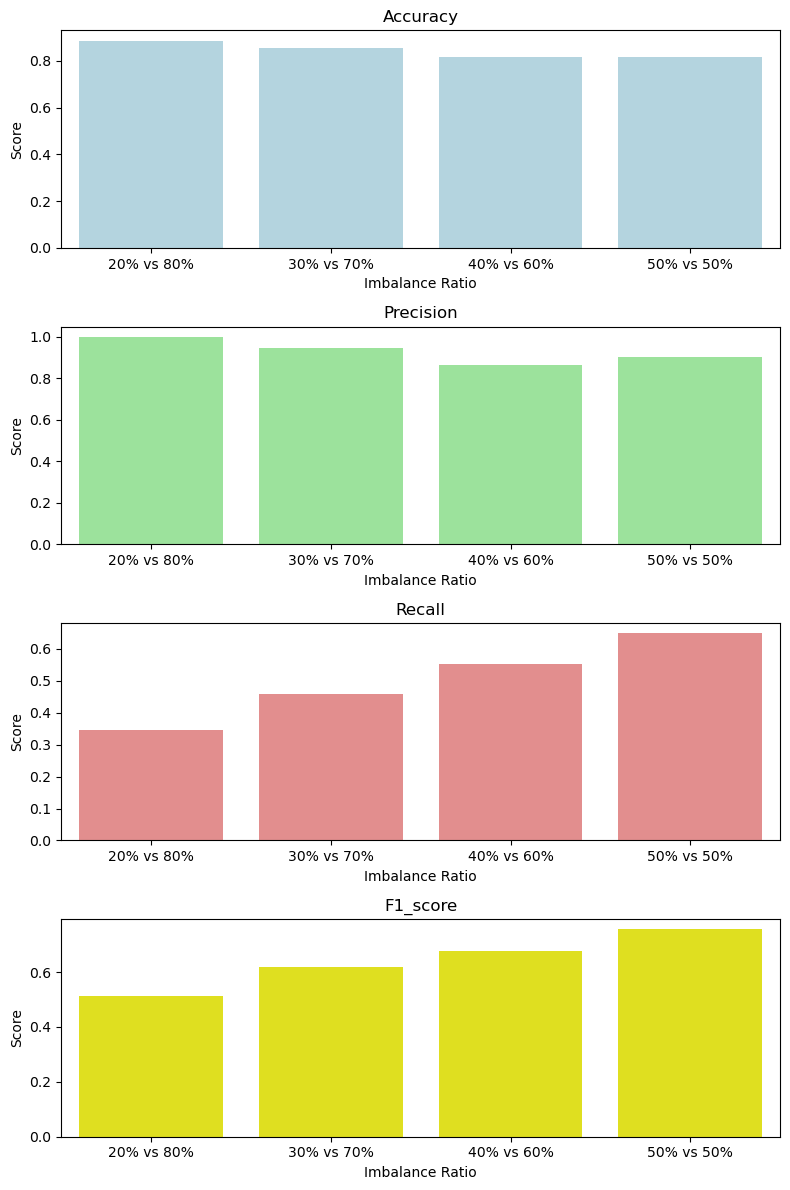

In [11]:
# Initialize lists to store results
settings = ['20% vs 80%', '30% vs 70%', '40% vs 60%', '50% vs 50%']
accuracies, precisions, recalls, f1_scores = [], [], [], []

# Loop through different class representations
for imbalance_ratio in [0.2, 0.3, 0.4,0.5]:
    # Create imbalanced dataset
    positive_samples = df[df['survived'] == 1].sample(frac=imbalance_ratio, random_state=42)
    negative_samples = df[df['survived'] == 0].sample(frac=1-imbalance_ratio, random_state=42)
    imbalanced_df = pd.concat([positive_samples, negative_samples])

    # Split the data into features (X) and labels (y)
    X = imbalanced_df.drop('survived', axis=1)
    y = imbalanced_df['survived']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Logistic Regression model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)

    # Append results to lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)

# Plot the results

fig, axes = plt.subplots(4, 1, figsize=(8, 12))

# Plot accuracy in the first subplot
sns.barplot(x=settings, y=accuracies, color='lightblue', label='Accuracy', ax=axes[0])
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Imbalance Ratio')
axes[0].set_ylabel('Score')


# Plot precision in the second subplot
sns.barplot(x=settings, y=precisions, color='lightgreen', label='Precision', ax=axes[1])
axes[1].set_title('Precision')
axes[1].set_xlabel('Imbalance Ratio')
axes[1].set_ylabel('Score')
1

# Plot recall in the third subplot
sns.barplot(x=settings, y=recalls, color='lightcoral', label='Recall', ax=axes[2])
axes[2].set_title('Recall')
axes[2].set_xlabel('Imbalance Ratio')
axes[2].set_ylabel('Score')


sns.barplot(x=settings, y=f1_scores, color='yellow', label='F1_score', ax=axes[3])
axes[3].set_title('F1_score')
axes[3].set_xlabel('Imbalance Ratio')
axes[3].set_ylabel('Score')


# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()